<h1 style="text-align: center;">Introduction to Data Science - Assignment 7</h1>
<h3 style="text-align: center;">Name: Hugo Hayashi</h3>
<h3 style="text-align: center;">Student ID: 22446441</h3>



## Question 1


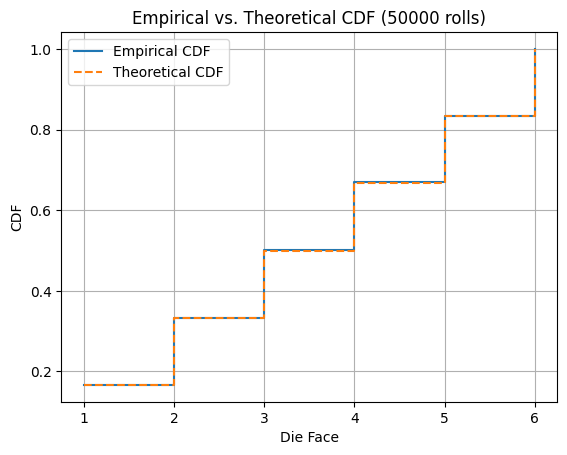

Sample Mean: 3.49594
Sample Variance: 2.9089435164


[0.16666, 0.16604, 0.16874, 0.16854, 0.1633, 0.16672]

In [1]:
# Your fancy code here
import numpy as np
import random
import matplotlib.pyplot as plt

def roll_dice(n):
    """
    Simulate rolling a die n times and plot the empirical CDF against the theoretical CDF.
    """

    faces = [1, 2, 3, 4, 5, 6]
    counts = [0] * 6

    for _ in range(n):
        r = random.randint(1, 6)
        counts[r - 1] += 1

    # Relative frequencies
    rel_freq = [c / n for c in counts]

    # Cumulative sum of relative frequencies
    empirical_cdf = []
    cumulative = 0
    for p in rel_freq:
        cumulative += p
        empirical_cdf.append(cumulative)

    # Plot empirical CDF
    plt.step(faces, empirical_cdf, where='post', label='Empirical CDF')

    # Theoretical CDF
    theoretical_cdf = [i / 6 for i in faces]
    plt.step(faces, theoretical_cdf, where='post', linestyle='--', label='Theoretical CDF')

    plt.xlabel("Die Face")
    plt.ylabel("CDF")
    plt.title(f"Empirical vs. Theoretical CDF ({n} rolls)")
    plt.legend()
    plt.grid(True)
    plt.show()

    sample_mean = sum((i + 1) * rel_freq[i] for i in range(6))
    sample_var = sum(pow((i + 1) - sample_mean, 2) * rel_freq[i] for i in range(6))
    print(f"Sample Mean: {sample_mean:}")
    print(f"Sample Variance: {sample_var:}")
    
    return rel_freq

roll_dice(50000)

With 50,000 simulated rolls of a fair die, the sample mean and variance closely match the theoretical values E[X]=3.5 and Var[X]=35/12, demonstrating strong agreement.

## Question 2

In [2]:
#More code and comments...
from scipy.stats import norm, t
print("P(T>2)=", 1 - t.cdf(2, 5))
print("P(X>2)=", 1 - norm.cdf(2, 0, 1))

P(T>2)= 0.050969739414929105
P(X>2)= 0.02275013194817921


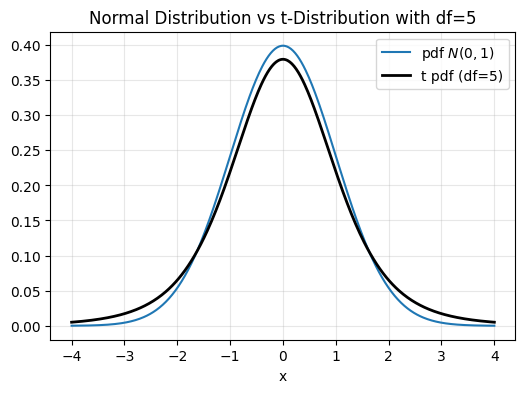

In [3]:
mu, sigma = 0, 1
df = 5
xs = np.linspace(mu - 4*sigma, mu + 4*sigma, 400)

plt.figure(figsize=(6,4))
plt.plot(xs, norm.pdf(xs, mu, sigma), label=r"pdf $N(0,1)$")
plt.plot(xs, t.pdf(xs, df), "k-", lw=2, label=f"t pdf (df={df})")
plt.xlabel("x")
plt.title("Normal Distribution vs t-Distribution with df=5")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

P(T>2) and P(Z>2) differ since the t-distribution with 5 degrees of freedom has heavier tails than the normal distribution, which makes extreme values occur more. As the degrees of freedom increase, the t-distribution becomes closer to the normal distribution as it concentrates more to the center, making the tails become more narow and the peak of the distribution become taller. Likewise, when the degrees of freedom is very high, this makes the difference between P(T>2) and P(Z>2) negligible.

## Question 3

In [4]:
from scipy.stats import multivariate_normal

mean = [0, 0]
cov = [[1, 0.7],
       [0.7, 1]]
n = 100000

dist = multivariate_normal(mean, cov)
samples = dist.rvs(size=n)

filtered = samples[samples[:, 1] > 1]
emp = filtered[:, 0].mean()

print("Empirical E[X | Y > 1]:", emp)

Empirical E[X | Y > 1]: 1.0636949789234638


In [5]:
mu_x, mu_y = 0, 0
sigma_x, sigma_y = 1, 1
cc = 0.7 / (1 * 1)
y = 1

z = (y - mu_y) / sigma_y

pdf_z = norm.pdf(z)
cdf_z = norm.cdf(z)

theoretical_E = mu_x + cc * sigma_x * (pdf_z / (1 - cdf_z))

print("Theoretical E[X | Y > 1]:", theoretical_E)

Theoretical E[X | Y > 1]: 1.0675946933126867


The empirical estimate of E[X | Y > 1] was very close to the theoretical value of E[X | Y > 1]. Any small difference between them is due to sampling randomness in the simulation. With a large enough sample size, this difference becomes negligible.

## Question 4